# 판다스를 활용한 자료탐색 기초

회사 자료를 직접 활용해서 글을 작성하는건 아쉽게도(?) 불가능하니 모두가 관심이 많은 주식 관련 데이터를 만져볼까 합니다.

kiwoom API로 데이터를 수집할까 했다가 반년쯤 전에 네이버 주식페이지 크롤러를 만들어놨던게 생각나서 그걸 다시 돌려봤습니다.  
짧게 종목코드(000000)~(005000)사이의 250개 종목만 들어있는 csv 파일입니다.

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

plt.rcParams['axes.unicode_minus'] = False  # matplotlib 마이너스기호 표시
plt.rc('font', family='NanumGothic')  # matplotlib 한글폰트 표시


import pandas as pd

df = pd.read_csv('stock_market.csv')

## 1. 데이터 개괄 살펴보기

데이터프레임을 활용해 데이터 개괄을 살펴보는 방식은 여러가지가 있습니다.  
여기서는 기본적인 3가지 방식만 먼저 보겠습니다.

- info()
- describe()
- head(), tail()

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    250 non-null    object 
 1   Name                  250 non-null    object 
 2   Market                250 non-null    object 
 3   Category              250 non-null    object 
 4   Capital               250 non-null    int64  
 5   PER                   249 non-null    float64
 6   EPS                   250 non-null    int64  
 7   ROE                   249 non-null    float64
 8   PBR                   250 non-null    float64
 9   EV                    157 non-null    float64
 10  BPS                   250 non-null    int64  
 11  Group_PER             250 non-null    float64
 12  Revenue               250 non-null    int64  
 13  Operating_Income      250 non-null    int64  
 14  Net_Income            250 non-null    int64  
 15  Dividend              1

`.info()`를 활용하면 데이터 개수와 각 칼럼의 데이터타입, null 여부를 확인할 수 있어 유용합니다. 

In [3]:
df.describe()

,Capital,PER,EPS,ROE,PBR,EV,BPS,Group_PER,Revenue,Operating_Income,...,Debt_continuous,Retention,Retention_Continuous,Open,High,Low,Close,DaytoDay,Volume,Highest_Price
count,250.000000,249.000000,250.000000,249.00000,250.000000,157.000000,2.500000e+02,250.000000,250.000000,250.000000,...,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,2.500000e+02,250.000000
mean,10898.852000,4.545221,209.928000,6.77510,1.072160,21.470828,7.551041e+04,17.908800,9316.360000,632.992000,...,1.828000,2839.620400,2.996000,38892.124000,39676.600000,38561.144000,39294.172000,633.944000,6.018891e+05,56882.124000
std,57713.804674,92.761163,3551.201312,24.26233,1.220344,63.954942,1.883453e+05,24.351651,23830.066818,3001.286352,...,1.208411,6751.631504,1.768756,72336.989575,73809.494728,71944.046303,73414.157777,1661.466236,2.976599e+06,103776.416399
min,30.000000,-554.080000,-27196.000000,-118.36000,-5.150000,-4.250000,-5.380000e+02,-54.430000,13.000000,-579.000000,...,1.000000,-140.670000,1.000000,0.000000,0.000000,0.000000,299.000000,0.000000,0.000000e+00,0.000000
25%,855.250000,2.930000,-71.000000,1.59000,0.430000,6.220000,5.237000e+03,6.710000,495.000000,2.000000,...,1.000000,271.360000,1.000000,4631.250000,4756.250000,4575.000000,4647.500000,45.000000,5.815000e+03,7369.500000
50%,1663.500000,6.760000,79.500000,6.39000,0.670000,9.450000,1.570500e+04,10.405000,1774.000000,47.000000,...,1.000000,957.585000,3.000000,14175.000000,14425.000000,14025.000000,14325.000000,160.000000,5.475950e+04,21450.000000
75%,4144.000000,16.850000,672.250000,11.48000,1.367500,17.390000,6.239950e+04,20.600000,5452.000000,216.000000,...,2.000000,2720.487500,5.000000,41162.500000,41987.500000,39875.000000,40287.500000,500.000000,2.313110e+05,60806.750000
max,819003.000000,544.240000,15024.000000,305.77000,9.220000,771.500000,2.011830e+06,127.460000,171884.000000,42195.000000,...,5.000000,64024.100000,5.000000,632000.000000,654000.000000,632000.000000,654000.000000,19000.000000,4.290845e+07,813000.000000


`.describe()`를 활용하면 각 칼럼에서의 최대, 최소, 4분위값, 평균과 표준편차를 확인할 수 있어 매우 간편합니다.

In [4]:
df.head(3)

,ID,Name,Market,Category,Capital,PER,EPS,ROE,PBR,EV,...,Retention_Continuous,Open,High,Low,Close,DaytoDay,Volume,Highest_Price,Highest_Date,update_date
0,000020,동화약품,KOSPI,제약,3282,22.82,204,5.27,1.16,9.45,...,5,11400,11750,11400,11750,300,67692,21550,2020-08-11,2022-05-13 07:04:42
1,000040,KR모터스,KOSPI,자동차,761,-8.77,-48,-25.82,2.25,27.12,...,1,786,804,786,792,8,80163,1450,2019-07-05,2022-05-13 06:31:50
2,000050,경방,KOSPI,"섬유,의류,신발,호화품",4208,16.92,155,2.98,0.46,8.86,...,5,15100,15350,14900,15350,200,8396,17750,2022-04-26,2022-05-13 06:48:06


`.head()`나 `.tail()`을 활용하면 실제 데이터를 볼 수 있기 때문에 직관적인 파악이 가능하다는 장점이 있습니다.

## 2. 범주형 자료 탐색

위의 방식들만으로는 `Market`와 같은 범주형자료의 분포를 파악하기에 한계가 있습니다.  
판다스 메소드 `value_counts()` 를 활용하면 간단히 범주형자료들을 확인해 볼 수 있습니다.

- value_counts()

In [5]:
df.Market.value_counts()

KOSPI     237
KOSDAQ     13
Name: Market, dtype: int64

In [6]:
df['Category'].value_counts()

제약              24
식품              22
증권              20
건축자재            15
화학              15
섬유,의류,신발,호화품    14
건설              14
복합기업            13
자동차부품           13
철강              13
손해보험            10
항공화물운송과물류        7
종이와목재            6
음료               6
포장재              5
비철금속             5
가정용기기와용품         3
화장품              3
생명보험             3
반도체와반도체장비        3
기계               3
항공사              3
자동차              3
전기제품             2
전자장비와기기          2
가스유틸리티           2
석유와가스            2
무역회사와판매업체        2
디스플레이장비및부품       2
전기장비             2
방송과엔터테인먼트        1
레저용장비와제품         1
컴퓨터와주변기기         1
가구               1
무선통신서비스          1
건강관리장비와용품        1
생물공학             1
식품과기본식료품소매       1
전문소매             1
에너지장비및서비스        1
핸드셋              1
도로와철도운송          1
백화점과일반상점         1
Name: Category, dtype: int64

종목코드 00000~005000 사이의 250개 종목들은 KOSPI가 압도적으로 많고, 제약회사와 식품회사가 상대적으로 많음을 알 수 있습니다.  

좀 더 직관적으로 확인하고 싶으니 시각화를 해봅시다.

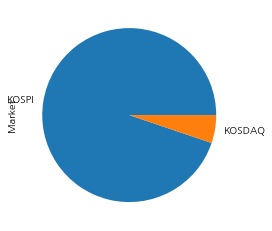

In [7]:
%matplotlib inline
df['Market'].value_counts().plot(kind="pie")

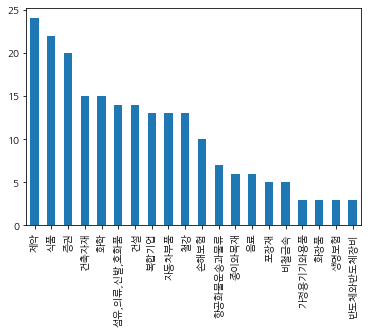

In [8]:
df.Category.value_counts()[:20].plot(kind="bar")

bar그래프에서는 상위 20개 카테고리만 살펴보았습니다.  
도표로 보니 좀 더 직관적입니다.  

## 3. 연속형 자료 탐색
대략적인 연속형 자료 탐색은 1. 데이터 개괄 살펴보기에서 `.describe()`를 통해 간단하게 살펴보았습니다만,  
숫자로만 보니 그닥 와닿지가 않습니다.
연속형 자료의 분포를 좀 더 살펴봅시다.

- skew() : 왜도(skewness)
- kurtosis : 첨도(kurtosis)

In [9]:
df.skew()

Capital                 12.004460
PER                     -1.424783
EPS                     -3.388658
ROE                      6.757212
PBR                      2.424926
EV                      10.573150
BPS                      6.032474
Group_PER                1.814353
Revenue                  4.411730
Operating_Income        11.237130
Net_Income              12.101541
Dividend                 1.220583
Debt                     0.707430
Debt_continuous          1.325841
Retention                6.810874
Retention_Continuous    -0.033400
Open                     4.414171
High                     4.470675
Low                      4.438313
Close                    4.500973
DaytoDay                 6.923529
Volume                  11.993030
Highest_Price            4.347724
dtype: float64

`Debt`와 `Retention_Continuous`는 비교적 0과 가깝지만,  
특히 `Capital`과 `Net_Income`등은 왜도 값이 12로, 값들이 왼쪽으로 치우쳐져있음을 알 수 있습니다.

그럼 실제 모습은 어떨지 그래프로도 확인해보겠습니다.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022A13432280>,
      dtype=object)

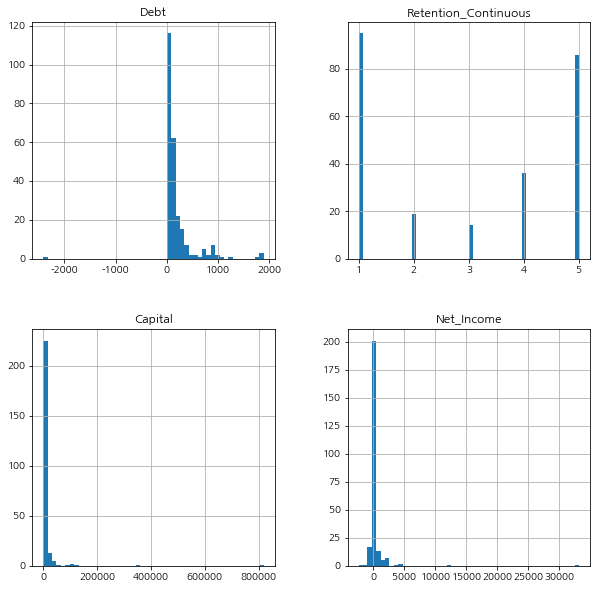

In [10]:
df[['Debt', 'Retention_Continuous', 'Capital', 'Net_Income']].hist(bins=50, figsize=(10,10))

`Debt`와 `Retention_Continuous`는 0과 가까워 비교적 정규분포와 비슷한 모양을 띠지 않을까 기대했지만,  
`Debt`에서는 빚이 마이너스 수치를 나타내는 이해하기 힘든 데이터가 존재하므로 한번 검토해봐야 함을 알 수 있습니다.  
`Retention_Continuous`에서는 정규분포와는 상하반전된 형태로 좌우 균형을 나타내기 때문에 0과 유사한 값이 나타났음을 알 수 있습니다.

In [11]:
df.kurtosis()

Capital                 160.106356
PER                      23.315257
EPS                      30.061399
ROE                      96.289091
PBR                      16.090916
EV                      123.121259
BPS                      49.387270
Group_PER                 3.789701
Revenue                  21.202937
Operating_Income        149.662412
Net_Income              165.134548
Dividend                  1.087868
Debt                     19.171876
Debt_continuous           0.497723
Retention                55.890376
Retention_Continuous     -1.796421
Open                     25.257447
High                     26.151345
Low                      25.614375
Close                    26.553923
DaytoDay                 64.312979
Volume                  165.830439
Highest_Price            23.484320
dtype: float64

`Debt_continuous`는 비교적 0과 가까워 첨도가 정규분포와 유사한 모습이지만,  
특히 `Capital`과 `Net_Income`등은 첨도 값이 160이나 되어서, 값들이 좁은 영역에 매우 몰려있음을 알 수 있습니다.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022A13AE5A60>,
      dtype=object)

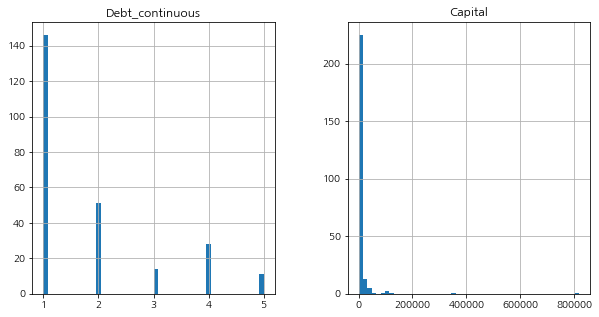

In [12]:
df[['Debt_continuous', 'Capital']].hist(bins=50, figsize=(10,5))

매우 뾰족한 `Capital`에 비해, `Debt_continuous`는 비교적 완만한 첨도를 나타내고 있습니다.